# `shippy`: a platform to import and analyze data on cruise tourism in SE Alaska.

## Stage A. Run app with selected data folders in the proper directory

In [1]:
from app import App
from BoatsData import BoatsData
from BoatData import BoatData
from Cruise import Cruise
from Geoprocessor import Geoprocessor
from PortManager import PortManager
from PathCalculations import PathCalculations
from Mapper import Mapper
from Statistics import Statistics

import matplotlib.pyplot as plt

import pandas as pd
import os

# Load data from main dir of data folders
a = App(r'./data/ais_data')

# export a line shapefile for each ais_data_folder (year) for GIS-based QA/QC
for data_id, data in a.data_dict.items():
    filename = data_id + '_boatDataLineShapefile.shp'
    Geoprocessor.boatsDataToLinesShapefile(data['boatsData'], os.path.join(r'./main_products/boatData', filename))

created new cruise for this: AMSTERDAM_01
created new cruise for this: AMSTERDAM_02
created new cruise for this: AMSTERDAM_03
created new cruise for this: AMSTERDAM_04
created new cruise for this: AMSTERDAM_05
created new cruise for this: AMSTERDAM_06
created new cruise for this: AMSTERDAM_07
created new cruise for this: AMSTERDAM_08
created new cruise for this: AMSTERDAM_09
created new cruise for this: AMSTERDAM_10
created new cruise for this: AMSTERDAM_11
created new cruise for this: AMSTERDAM_12
created new cruise for this: AMSTERDAM_13
created new cruise for this: AMSTERDAM_14
created new cruise for this: AMSTERDAM_15
created new cruise for this: AMSTERDAM_16
created new cruise for this: AMSTERDAM_17
created new cruise for this: AMSTERDAM_18
created new cruise for this: ASUKA 2_01
created new cruise for this: CARNIVAL SPIRIT_01
created new cruise for this: CARNIVAL SPIRIT_02
created new cruise for this: CARNIVAL SPIRIT_03
created new cruise for this: CARNIVAL SPIRIT_04
created new 

/Users/Graham/cruise/BoatsData.py:212: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  transits_stats = pd.merge(transits_stats, unique_segment_ids, on=['from_port', 'to_port'])


## Stage B: Analyze AIS Data

In [2]:
df = a.getFlattenedAISData('2012_ais')

In [3]:
df

,lat,lon,bs_ts,geometry,ak_dt,mmsi,imo,call_sign,name,sog,cog,cruise_id
0,54.21672,-133.7353,2012-05-19 22:51:40-08:00,POINT (-133.7353 54.21672),2012-05-19 21:51:40,244370000,9188037,PBAD,AMSTERDAM,20.0,344.0,AMSTERDAM_01
1,54.21887,-133.7363,2012-05-19 22:53:30-08:00,POINT (-133.7363 54.21887),2012-05-19 21:53:30,244370000,9188037,PBAD,AMSTERDAM,20.1,344.0,AMSTERDAM_01
2,54.25606,-133.7543,2012-05-19 22:59:36-08:00,POINT (-133.7543 54.25606),2012-05-19 21:59:36,244370000,9188037,PBAD,AMSTERDAM,19.9,345.0,AMSTERDAM_01
3,54.38090,-133.8149,2012-05-19 23:23:47-08:00,POINT (-133.8149 54.3809),2012-05-19 22:23:47,244370000,9188037,PBAD,AMSTERDAM,20.1,344.0,AMSTERDAM_01
4,54.51862,-133.8817,2012-05-19 23:48:06-08:00,POINT (-133.8817 54.51862),2012-05-19 22:48:06,244370000,9188037,PBAD,AMSTERDAM,20.4,343.9,AMSTERDAM_01
...,...,...,...,...,...,...,...,...,...,...,...,...
1811034,54.59367,-131.3373,2012-09-27 21:57:00-08:00,POINT (-131.3373 54.59367),2012-09-27 20:57:00,245304000,9221279,PBIG,ZUIDERDAM,12.6,185.0,ZUIDERDAM_20
1811035,54.58933,-131.3375,2012-09-27 21:58:11-08:00,POINT (-131.3375 54.58933),2012-09-27 20:58:11,245304000,9221279,PBIG,ZUIDERDAM,12.8,181.0,ZUIDERDAM_20
1811036,54.58583,-131.3373,2012-09-27 21:59:11-08:00,POINT (-131.3373 54.58583),2012-09-27 20:59:11,245304000,9221279,PBIG,ZUIDERDAM,13.1,177.0,ZUIDERDAM_20
1811037,54.58216,-131.3370,2012-09-27 22:00:11-08:00,POINT (-131.337 54.58216),2012-09-27 21:00:11,245304000,9221279,PBIG,ZUIDERDAM,13.3,175.0,ZUIDERDAM_20


### 1. Visits to Glacier Bay: 2023 AIS Data

In [5]:
data_id = '2012_ais'
glba_visits_2023 = a.getGLBAVisitTable(data_id)
glba_visits_2023.to_csv(os.path.join(r'./main_products', f'glba_visits_{data_id}.csv'))
glba_visits_2023


,index,date,boatName,mmsi,imo,portAfter,portBefore,ts_in,ts_out,timeTo,distTo,first_ts_in_next_port,mean_sog,max_sog,segment_id
0,169,2012-05-02,ZAANDAM,246442000,9156527,Juneau,Glacier Bay,2012-05-02 09:53:02-08:00,2012-05-02 19:34:02-08:00,136.068,565.25,2012-05-08 11:38:07-08:00,15.190635,21.1,ZAANDAM_0002
1,2,2012-05-05,CARNIVAL SPIRIT,357658000,9188647,Ketchikan,Skagway,2012-05-05 07:11:58-08:00,2012-05-05 15:52:21-08:00,15.916,301.56,2012-05-06 07:47:18-08:00,19.075785,21.9,CARNIVAL_SPIRIT_0006
2,128,2012-05-06,VOLENDAM,245968000,9156515,Ketchikan,Skagway,2012-05-06 07:01:48-08:00,2012-05-06 15:52:24-08:00,17.634,301.84,2012-05-07 09:30:28-08:00,17.098736,20.7,VOLENDAM_0006
3,68,2012-05-10,NORWEGIAN PEARL,309653000,9342281,Ketchikan,Skagway,2012-05-10 06:03:00-08:00,2012-05-10 14:42:00-08:00,14.717,304.49,2012-05-11 05:25:00-08:00,20.488117,25.4,NORWEGIAN_PEARL_0026
4,129,2012-05-13,VOLENDAM,245968000,9156515,Ketchikan,Skagway,2012-05-13 06:56:21-08:00,2012-05-13 16:13:55-08:00,16.952,305.04,2012-05-14 09:11:02-08:00,17.864571,20.3,VOLENDAM_0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,67,2012-09-21,ISLAND PRINCESS,310384000,9230402,Skagway,Hubbard Glacier,2012-09-21 08:48:00-08:00,2012-09-21 17:28:05-08:00,12.634,128.36,2012-09-22 06:06:06-08:00,10.169444,12.9,ISLAND_PRINCESS_0166
204,148,2012-09-23,VOLENDAM,245968000,9156515,Ketchikan,Skagway,2012-09-23 07:00:08-08:00,2012-09-23 16:14:23-08:00,17.110,302.77,2012-09-24 09:21:00-08:00,17.646244,19.9,VOLENDAM_0166
205,168,2012-09-25,WESTERDAM,244128000,9226891,atSea,Glacier Bay,2012-09-25 07:01:04-08:00,2012-09-25 16:42:07-08:00,21.219,187.15,2012-09-26 09:38:02-08:00,10.887759,17.5,WESTERDAM_0118
206,105,2012-09-26,SAPPHIRE PRINCESS,310405000,9228186,Ketchikan,Skagway,2012-09-26 06:51:06-08:00,2012-09-26 15:21:04-08:00,17.701,304.59,2012-09-27 09:03:08-08:00,17.002657,21.6,SAPPHIRE_PRINCESS_0164


In [6]:
glba_visits_2023.portAfter.value_counts()

Ketchikan           85
Skagway             35
Glacier Bay         31
Hubbard Glacier     22
Haines              19
atSea               12
Whittier             2
Juneau               1
Icy Strait Point     1
Name: portAfter, dtype: int64

### 2. Summary of transits after Glacier Bay: 2023 AIS Data

In [5]:
summary_table_groupby_next_port = Statistics.summary_table2(glba_visits_2023, 'portAfter',
                                                          ['mean_sog', 'timeTo', 'distTo'], ['mean','std','count'])
summary_table_groupby_next_port.to_csv(os.path.join(r'./main_products', f'after_glba_summary_stats_{data_id}.csv'))
summary_table_groupby_next_port

,portAfter,mean_sog_mean,mean_sog_std,mean_sog_count,timeTo_mean,timeTo_std,timeTo_count,distTo_mean,distTo_std,distTo_count
0,College Fjord,16.558435,0.581113,45,26.166178,0.686959,45,462.294000,2.207706,45
1,Haines,10.349444,NaN,1,13.289000,NaN,1,140.180000,NaN,1
2,Hubbard Glacier,12.990393,0.574139,13,15.355231,0.666344,13,192.016923,2.446611,13
3,Icy Strait Point,14.027935,2.008408,36,3.565917,5.117236,36,41.428611,39.421425,36
4,Juneau,13.352919,2.487096,3,13.470667,0.647719,3,180.686667,41.432483,3
5,Ketchikan,17.058081,1.281987,105,16.772305,1.730279,105,304.054667,6.877097,105
6,Prince Rupert,17.164289,0.077716,2,20.420000,0.178191,2,398.975000,2.764788,2
7,Sitka,10.870204,0.798225,5,13.809000,1.533485,5,148.290000,14.348747,5
8,Skagway,11.793718,1.468493,43,10.738372,1.345865,43,127.133488,26.453186,43
9,Vancouver,14.169725,0.513219,2,62.872500,1.270671,2,929.470000,62.918361,2


### 3. Mapping routes and calculating management alternatives

#### Run workflow with incremental time adjustments

#### Map existing routes and speeds

#### Map hypothetical speeds (histogram)

In [ ]:
a.data_dict['2023_ais']['summary_table']

### 4. Enumerating vessels and gathering their metadata

In [46]:
data_id = '2023_ais'
unique_names_table = a.data_dict[data_id]['boatsData'].flatten().drop_duplicates(subset='name')
columns_to_check = ['callsign', 'mmsi', 'imo', 'shiptype', 'length', 'width']
varying_values = a.data_dict[data_id]['boatsData'].flatten().groupby('name')[columns_to_check].nunique()
inconsistent_names = varying_values[(varying_values > 1).any(axis=1)]
if not inconsistent_names.empty:
    print("Inconsistent data entries found:")
    print(inconsistent_names)
else:
    print("No inconsistencies found. All unique names have consistent values in other columns.")
columns_to_convert = ['mmsi', 'imo']
for col in columns_to_convert:
    unique_names_table[col] = unique_names_table[col].astype(int).astype(str)
unique_vessels = unique_names_table[['name', 'callsign', 'mmsi', 'imo', 'shiptype', 'length', 'width']].reset_index(drop=True)
unique_vessels
unique_vessels.to_csv(os.path.join(r'./main_products', f'unique_vessels_{data_id}.csv'))


Inconsistent data entries found:
                 callsign  mmsi  imo  shiptype  length  width
name                                                         
KONINGSDAM              1     1    1         1       1      2
NIEUW AMSTERDAM         1     1    1         1       1      2
NOORDAM                 1     1    1         1       2      1
ROYAL PRINCESS          1     1    2         1       2      2


## Stage C: Analyze Cruise Line Agencies of Alaska Historical Calendar

#### Import CLAA calendar

In [4]:
claa_df = pd.read_csv('./data/calendar/allyears_allports_claa.csv')
claa_df = claa_df.sort_values(by='date')

#### 1. Enumerate all port calls over the duration of the calendar

In [76]:
# TABLE OF PORT CALLS FOR ALL YEARS AND ALL VESSELS
ports = claa_df[['date', 'boatName','portName', 'nextPort']]
ports = ports[ports['portName']!= 'AT SEA']
#ports[['mmsi', 'imo', 'length', 'width', 'pax', 'gross_tonnage']] = None
ports['year'] = pd.to_datetime(ports['date']).dt.year
ports

port_calls_merged_with_ship_attributes = ports.merge(unique_vessels, left_on = 'boatName', right_on = 'name', how= 'inner')
ports



,date,boatName,portName,nextPort,year
24148,2008-04-27,NORWEGIAN STAR,VANCOUVER,AT SEA,2008
23685,2008-04-27,MERCURY,SAN FRANCISCO,AT SEA,2008
23399,2008-04-28,INFINITY,SAN FRANCISCO,AT SEA,2008
23149,2008-04-28,EMPRESS OF THE NORT,SEATTLE,AT SEA,2008
25294,2008-04-29,SEA LION,SEATTLE,AT SEA,2008
...,...,...,...,...,...
39867,2023-10-28,NORWEGIAN BLISS,SEATTLE,NaN,2023
40042,2023-10-28,NORWEGIAN ENCORE,VICTORIA,SEATTLE,2023
40517,2023-10-29,NORWEGIAN SUN,VICTORIA,SEATTLE,2023
40043,2023-10-29,NORWEGIAN ENCORE,SEATTLE,NaN,2023


#### 2. Histogram of unique ships over the years

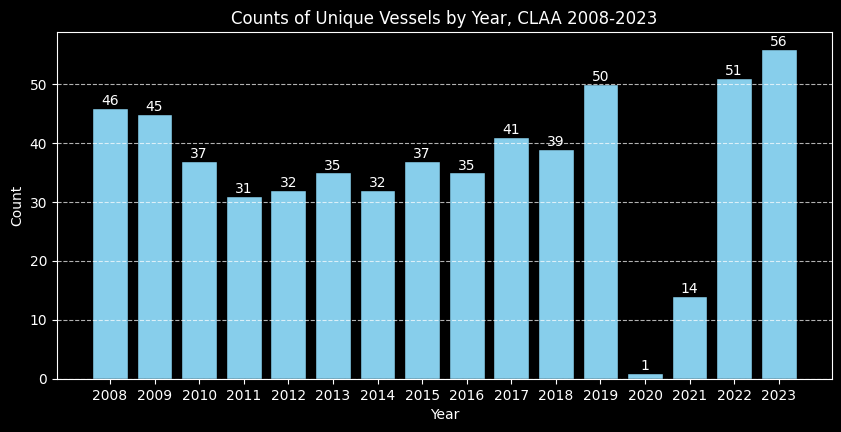

In [48]:
import matplotlib.pyplot as plt

portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ships = len(group.boatName.unique())
        new_row = {'year' : year,
                   'unique_ships' : unique_ships}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ships'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Unique Vessels by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.savefig(r'./main_products/unique_vessels_scheduled_per_year.png', dpi=300)  # Export as PNG with high resolution
plt.show()

#### 3. Line graph for total passenger visits per year


In [53]:
df = port_calls_merged_with_ship_attributes[port_calls_merged_with_ship_attributes.year!=2021]
df_grouped = df.groupby('year').agg({
    'pax' : 'mean'
}).reset_index()

plt.style.use('dark_background')  # Set dark mode
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['year'], df_grouped['length'], color='cyan', label='Average vessel length (m)', linewidth=2, linestyle='--')
plt.scatter(df_grouped['year'], df_grouped['length'], color='cyan', edgecolor='white', zorder=5)  # Adding points
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Vessel Length', color='white', fontsize=14)
plt.tick_params(axis='y', labelcolor='white')
plt.title('Trends in Vessel Lengths (2008 - 2024)', fontsize=16, color='white')
plt.grid(False)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(r'./main_products/total_passenger_capacity_trends.png', dpi=300)  # Export as PNG with high resolution
plt.show()

KeyError: "Column(s) ['pax'] do not exist"

#### 4. Line graph average vessel length per year

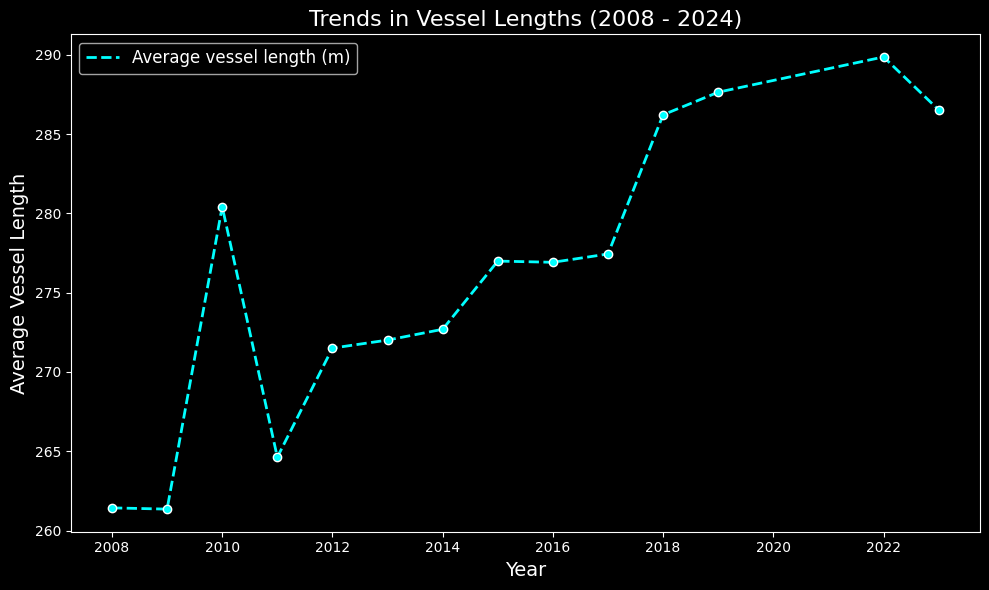

In [52]:
df = port_calls_merged_with_ship_attributes[port_calls_merged_with_ship_attributes.year!=2021]
df_grouped = df.groupby('year').agg({
    'length' : 'mean'
}).reset_index()

plt.style.use('dark_background')  # Set dark mode
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['year'], df_grouped['length'], color='cyan', label='Average vessel length (m)', linewidth=2, linestyle='--')
plt.scatter(df_grouped['year'], df_grouped['length'], color='cyan', edgecolor='white', zorder=5)  # Adding points
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Vessel Length', color='white', fontsize=14)
plt.tick_params(axis='y', labelcolor='white')
plt.title('Trends in Vessel Lengths (2008 - 2024)', fontsize=16, color='white')
plt.grid(False)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(r'./main_products/vessel_length_trends.png', dpi=300)  # Export as PNG with high resolution
plt.show()



#### 5. Histogram of unique ports per year

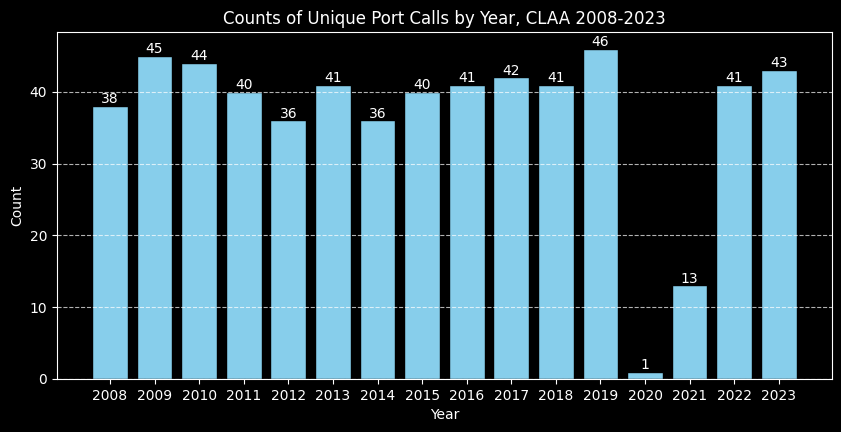

In [54]:
import matplotlib.pyplot as plt

portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ships = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ports' : unique_ships}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.savefig(r'./main_products/unique_portcalls_scheduled_per_year.png', dpi=300)  # Export as PNG with high resolution
plt.show()

#### 6. Summary statistics/plots for each port for each year

In [63]:
### Calculate statistics per port per year and display table
ports[['length', 'width', 'pax']] = None
ports = ports[['date', 'boatName', 'portName', 'year', 'length', 'width']]

stats_list = []
grouped = ports.groupby(['portName', 'year'])

for (port, year), group in grouped:
    first_call = min(group.date)
    last_call = max(group.date)

    #cumulative_pax = group['pax'].sum()
    count_calls = group['boatName'].count()
    mean_width = group['width'].mean()
    mean_length = group['length'].mean()
    count_unique = len(group['boatName'].unique())
    
    stats = {
        'portName': port,
        'year': year,
        'count_calls' : count_calls,
        'count_unique' : count_unique, # number of unique boats visiting each port per year
        #'max_pax' : cumulative_pax,
        'first_call' : first_call,
        'last_call' : last_call,
        'mean_width' : mean_width,
        'mean_length' : mean_length
    }
    stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
stats_df


,portName,year,count_calls,count_unique,first_call,last_call,mean_width,mean_length
0,ADAK,2008,1,1,2008-09-09,2008-09-09,NaN,NaN
1,ADAK,2009,1,1,2009-09-13,2009-09-13,NaN,NaN
2,ADAK,2010,1,1,2010-08-04,2010-08-04,NaN,NaN
3,ADAK,2011,1,1,2011-06-24,2011-06-24,NaN,NaN
4,ADAK,2012,1,1,2012-07-07,2012-07-07,NaN,NaN
...,...,...,...,...,...,...,...,...
583,WRANGELL,2018,30,5,2018-05-25,2018-10-03,NaN,NaN
584,WRANGELL,2019,37,8,2019-05-21,2019-10-03,NaN,NaN
585,WRANGELL,2021,3,1,2021-08-01,2021-09-12,NaN,NaN
586,WRANGELL,2022,62,10,2022-05-12,2022-09-25,NaN,NaN


Plotting time series for a particular port

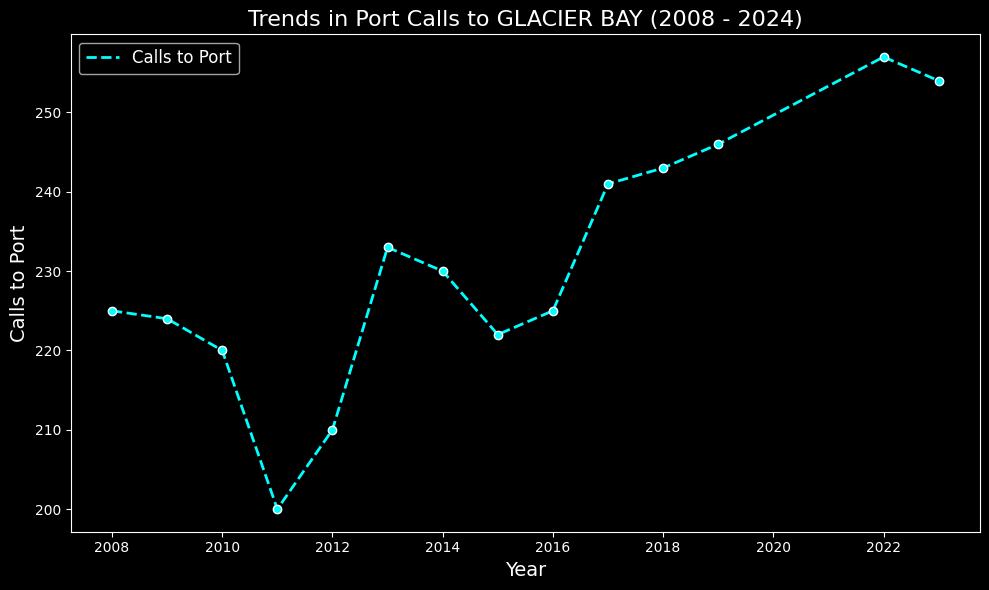

In [75]:
portName = 'Glacier Bay'

def plot_port_counts(portName):
    df = stats_df
    df = df[df.year != 2021]
    df = df[df.year != 2020]
    df_sub = df[df['portName'] == portName]

    plt.style.use('dark_background')  # Set dark mode
    plt.figure(figsize=(10, 6))
    plt.plot(df_sub['year'], df_sub['count_calls'], color='cyan', label='Calls to Port', linewidth=2, linestyle='--')
    plt.scatter(df_sub['year'], df_sub['count_calls'], color='cyan', edgecolor='white', zorder=5)  # Adding points
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Calls to Port', color='white', fontsize=14)
    plt.tick_params(axis='y', labelcolor='white')
    plt.title(f'Trends in Port Calls to {portName} (2008 - 2024)', fontsize=16, color='white')
    plt.grid(False)
    plt.legend(loc='upper left', fontsize=12)

    plt.tight_layout()
    plt.savefig(os.path.join(r'./main_products', f'{portName}_port_call_count_trends.png'), dpi=300)  # Export as PNG with high resolution
    plt.show()

plot_port_counts(portName.upper())

#### 7. Glacier sites as port calls

In [79]:
##### ASSIGN PORT AS A GLACIER PORT #####
import numpy as np
claa_df['year'] = pd.to_datetime(claa_df['date']).dt.year

glacier_ports = ['GLACIER BAY', 'TRACY ARM', 'ENDICOTT ARM', 'HUBBARD GLACIER', 'COLLEGE FJORD', 'MISTY FJORD']
claa_df['glacier_port'] = claa_df['portName'].apply(lambda x: any(port in x.upper() for port in glacier_ports))
claa_df['mod_port'] = np.where(claa_df['glacier_port'], 'GLACIER', claa_df['portName'])
#claa_df[claa_df.glacier_port == True]

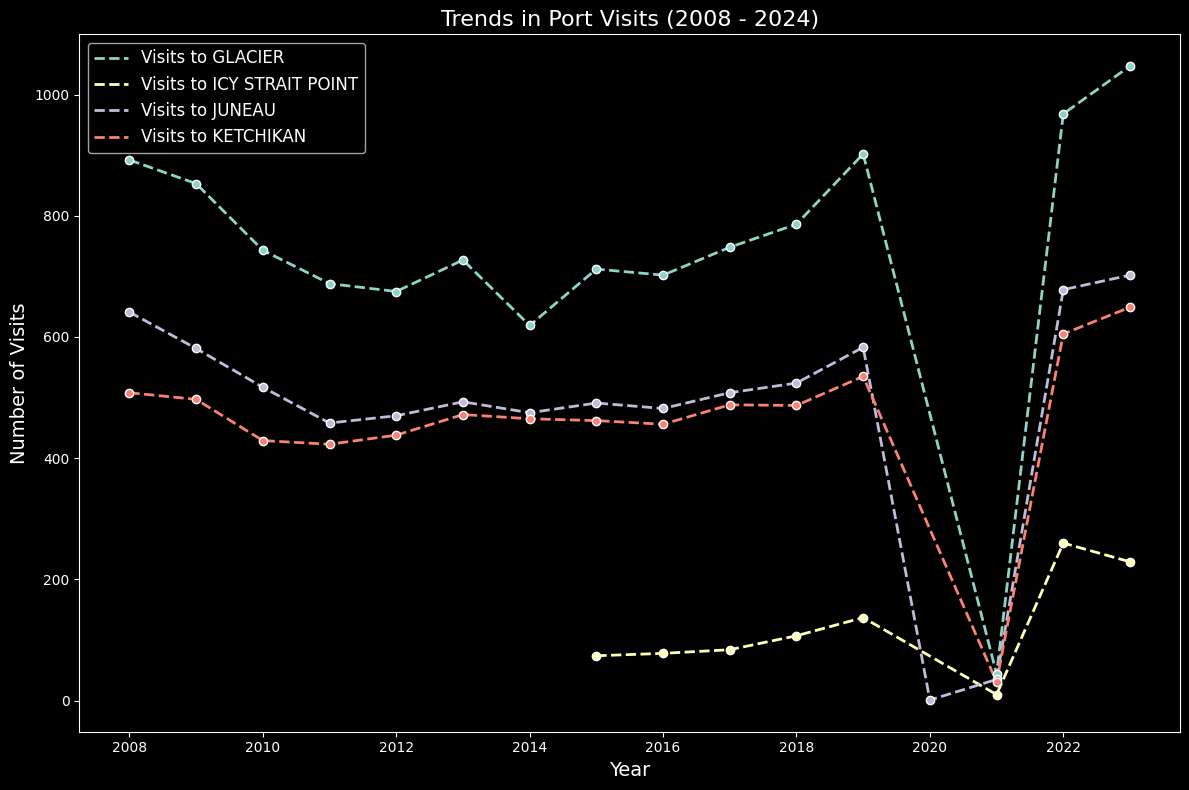

In [80]:
port_groups = ['GLACIER',  # Group of ports
    'ICY STRAIT POINT',  # Single port
    'JUNEAU',
    'KETCHIKAN'  # Single port
]
plt.style.use('dark_background')  # Set dark mode
plt.figure(figsize=(12, 8))
for port_group in port_groups:
    if isinstance(port_group, list):
        port_name_pattern = '|'.join(port_group)  # Create a regex pattern for the list of ports
    else:
        port_name_pattern = port_group
    
    df_subset = claa_df[claa_df['mod_port'].str.contains(port_name_pattern, case=False, na=False)]
    
    df_grouped = df_subset.groupby('year').agg({
        'mod_port': 'count'
    }).reset_index()
    
    plt.plot(df_grouped['year'], df_grouped['mod_port'], label=f'Visits to {port_group}', linewidth=2, linestyle='--')
    plt.scatter(df_grouped['year'], df_grouped['mod_port'], edgecolor='white', zorder=5)  # Adding points

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visits', color='white', fontsize=14)
plt.tick_params(axis='y', labelcolor='white')
plt.title('Trends in Port Visits (2008 - 2024)', fontsize=16, color='white')
plt.grid(False)

plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

## Stage D: Merging AIS empirical data into Historical Calendar Table

In [6]:
data_id = '2023_ais'
ais_transit_table = a.getAISTransitTable(data_id)
ais_transit_table

,portName,nextPort,from_port,to_port,distance_nm_mean,distance_nm_std,distance_nm_count,duration_hrs_mean,duration_hrs_std,duration_hrs_count,segment_ids
0,COLLEGE FJORD,GLACIER BAY,College Fjord,Glacier Bay,454.900000,NaN,1,23.593000,NaN,1,[GRAND_PRINCESS_0213]
1,COLLEGE FJORD,WHITTIER,College Fjord,Whittier,28.230217,0.531043,46,2.361326,0.620854,46,"[GRAND_PRINCESS_0015, GRAND_PRINCESS_0037, GRA..."
2,ENDICOTT ARM,GLACIER BAY,Endicott Arm,Glacier Bay,128.060000,NaN,1,16.349000,NaN,1,[QUEEN_ELIZABETH_0039]
3,ENDICOTT ARM,ICY STRAIT POINT,Endicott Arm,Icy Strait Point,106.306875,1.944197,16,9.972500,0.388508,16,"[NORWEGIAN_BLISS_0031, NORWEGIAN_BLISS_0041, N..."
4,ENDICOTT ARM,JUNEAU,Endicott Arm,Juneau,98.084000,62.110360,5,10.065200,7.050987,5,"[CROWN_PRINCESS_0047, NORWEGIAN_JEWEL_0193, NO..."
...,...,...,...,...,...,...,...,...,...,...,...
131,WHITTIER,HUBBARD GLACIER,Whittier,Hubbard Glacier,326.543488,5.408547,43,18.714023,0.657686,43,"[GRAND_PRINCESS_0017, GRAND_PRINCESS_0039, GRA..."
132,WRANGELL,JUNEAU,Wrangell,Juneau,230.550000,0.367696,2,15.215500,1.795344,2,"[SEABOURN_ODYSSEY_0069, VIKING_ORION_0045]"
133,WRANGELL,KETCHIKAN,Wrangell,Ketchikan,88.714444,0.401470,9,7.604000,0.634219,9,"[SEABOURN_ODYSSEY_0021, SEABOURN_ODYSSEY_0041,..."
134,WRANGELL,MISTY FJORDS,Wrangell,Misty Fjords,162.700000,NaN,1,13.889000,NaN,1,[SEABOURN_ODYSSEY_0235]


In [7]:
#### HISTORICAL TRENDS IN DISTANCES TO NEXT PORT #### 
attributed_claa_df = claa_df.merge(ais_transit_table, on=['portName', 'nextPort'], how='left').dropna()
attributed_claa_df['year'] = pd.to_datetime(attributed_claa_df['date']).dt.year
attributed_claa_df['boat_id_year'] = attributed_claa_df['year'].astype(str) + '_' + attributed_claa_df['boatName'].astype(str)
attributed_claa_df

,Unnamed: 0,date,boatName,portCode,ts_in,ts_out,portName,nextPort,from_port,to_port,distance_nm_mean,distance_nm_std,distance_nm_count,duration_hrs_mean,duration_hrs_std,duration_hrs_count,segment_ids,year,boat_id_year
8,24150,2008-04-29,NORWEGIAN STAR,KTN,2008-04-29 07:00:00,2008-04-29 15:00:00,KETCHIKAN,JUNEAU,Ketchikan,Juneau,381.728688,79.663882,160.0,62.616000,38.139062,160.0,"[CROWN_PRINCESS_0069, CROWN_PRINCESS_0093, EUR...",2008,2008_NORWEGIAN STAR
34,23691,2008-05-03,MERCURY,PR,2008-05-03 07:00:00,2008-05-03 17:00:00,PRINCE RUPERT,KETCHIKAN,Prince Rupert,Ketchikan,129.412500,3.388352,16.0,117.631938,29.735308,16.0,"[NIEUW_AMSTERDAM_0019, RUBY_PRINCESS_0041, RUB...",2008,2008_MERCURY
49,23692,2008-05-04,MERCURY,KTN,2008-05-04 07:00:00,2008-05-04 15:00:00,KETCHIKAN,JUNEAU,Ketchikan,Juneau,381.728688,79.663882,160.0,62.616000,38.139062,160.0,"[CROWN_PRINCESS_0069, CROWN_PRINCESS_0093, EUR...",2008,2008_MERCURY
51,27380,2008-05-04,VEENDAM,JNU,2008-05-04 14:00:00,2008-05-04 22:30:00,JUNEAU,SKAGWAY,Juneau,Skagway,98.807772,1.513485,193.0,7.963487,1.781696,193.0,"[CROWN_PRINCESS_0003, CROWN_PRINCESS_0029, CRO...",2008,2008_VEENDAM
53,23693,2008-05-05,MERCURY,JNU,2008-05-05 09:00:00,2008-05-05 17:00:00,JUNEAU,HUBBARD GLACIER,Juneau,Hubbard Glacier,272.400000,6.063481,4.0,19.795750,6.741764,4.0,"[CROWN_PRINCESS_0061, EURODAM_0043, QUEEN_ELIZ...",2008,2008_MERCURY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68367,39865,2023-10-26,NORWEGIAN BLISS,KTN,2023-10-26 06:30:00,2023-10-26 13:15:00,KETCHIKAN,VICTORIA,Ketchikan,Victoria,587.603043,9.856514,23.0,29.892391,2.377377,23.0,"[QUEEN_ELIZABETH_0027, QUEEN_ELIZABETH_0043, Q...",2023,2023_NORWEGIAN BLISS
68368,39866,2023-10-27,NORWEGIAN BLISS,VIC,2023-10-27 20:00:00,2023-10-27 23:59:00,VICTORIA,SEATTLE,Victoria,Seattle,57.003810,50.206721,21.0,3.833000,5.192184,21.0,"[ROYAL_PRINCESS_0013, ROYAL_PRINCESS_0025, ROY...",2023,2023_NORWEGIAN BLISS
68369,40041,2023-10-27,NORWEGIAN ENCORE,KTN,2023-10-27 08:00:00,2023-10-27 13:15:00,KETCHIKAN,VICTORIA,Ketchikan,Victoria,587.603043,9.856514,23.0,29.892391,2.377377,23.0,"[QUEEN_ELIZABETH_0027, QUEEN_ELIZABETH_0043, Q...",2023,2023_NORWEGIAN ENCORE
68373,40042,2023-10-28,NORWEGIAN ENCORE,VIC,2023-10-28 20:00:00,2023-10-28 23:59:00,VICTORIA,SEATTLE,Victoria,Seattle,57.003810,50.206721,21.0,3.833000,5.192184,21.0,"[ROYAL_PRINCESS_0013, ROYAL_PRINCESS_0025, ROY...",2023,2023_NORWEGIAN ENCORE


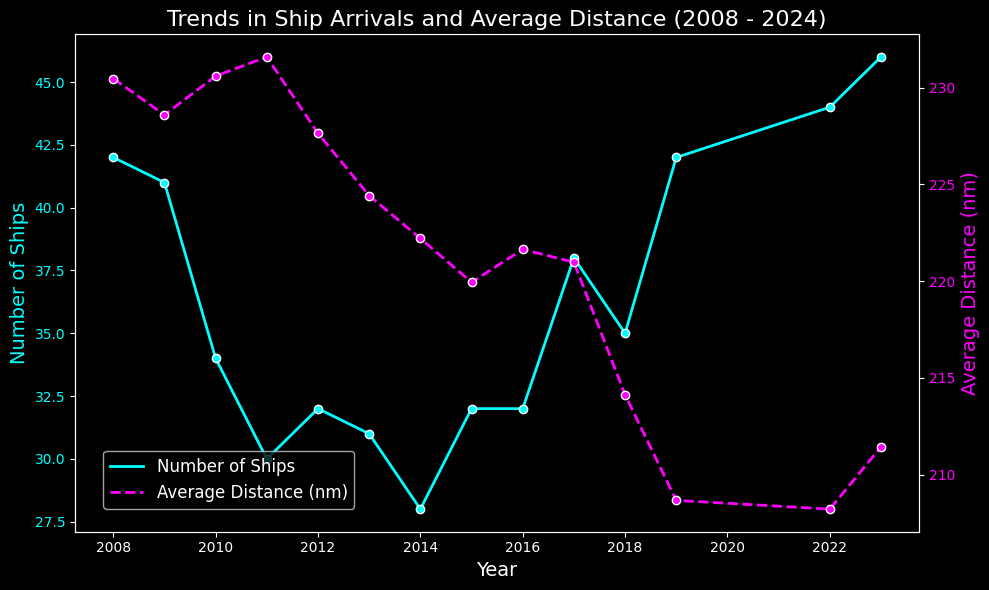

In [8]:

attributed_claa_df_no2021 = attributed_claa_df[attributed_claa_df.year != 2021]
df_grouped = attributed_claa_df_no2021.groupby('year').agg({
    'boatName': 'nunique',  # Count unique ships
    'distance_nm_mean': 'mean'   # Calculate average distance
}).reset_index()

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_grouped['year'], df_grouped['boatName'], color='cyan', label='Number of Ships', linewidth=2)
ax1.scatter(df_grouped['year'], df_grouped['boatName'], color='cyan', edgecolor='white', zorder=5)  
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Ships', color='cyan', fontsize=14)
ax1.tick_params(axis='y', labelcolor='cyan')

ax2 = ax1.twinx()
ax2.plot(df_grouped['year'], df_grouped['distance_nm_mean'], color='magenta', label='Average Distance (nm)', linewidth=2, linestyle='--')
ax2.scatter(df_grouped['year'], df_grouped['distance_nm_mean'], color='magenta', edgecolor='white', zorder=5)
ax2.set_ylabel('Average Distance (nm)', color='magenta', fontsize=14)
ax2.tick_params(axis='y', labelcolor='magenta')


plt.title('Trends in Ship Arrivals and Average Distance (2008 - 2024)', fontsize=16, color='white')
ax1.grid(False)  
ax2.grid(False) 
fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.13), fontsize=12) 

plt.tight_layout()
plt.show()

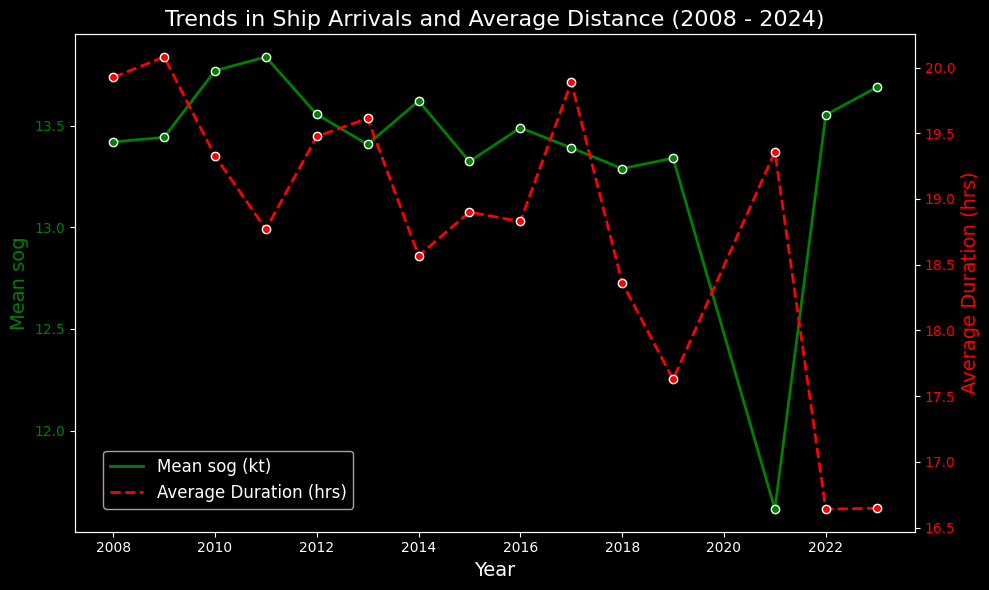

In [9]:
import numpy as np
attributed_claa_df['mean_sog'] = np.where(
    attributed_claa_df['duration_hrs_mean'] != 0, 
    attributed_claa_df['distance_nm_mean'] / attributed_claa_df['duration_hrs_mean'],
    np.nan  
)

df_grouped = attributed_claa_df.groupby('year').agg({
    'boatName': 'nunique',  # Count unique ships
    'mean_sog': 'mean',  # Calculate average distance
    'duration_hrs_mean' : 'mean'
}).reset_index()

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_grouped['year'], df_grouped['mean_sog'], color='green', label='Mean sog (kt)', linewidth=2)
ax1.scatter(df_grouped['year'], df_grouped['mean_sog'], color='green', edgecolor='white', zorder=5) 
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Mean sog', color='green', fontsize=14)
ax1.tick_params(axis='y', labelcolor='green')
ax2 = ax1.twinx()
ax2.plot(df_grouped['year'], df_grouped['duration_hrs_mean'], color='red', label='Average Duration (hrs)', linewidth=2, linestyle='--')
ax2.scatter(df_grouped['year'], df_grouped['duration_hrs_mean'], color='red', edgecolor='white', zorder=5)
ax2.set_ylabel('Average Duration (hrs)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')


plt.title('Trends in Ship Arrivals and Average Distance (2008 - 2024)', fontsize=16, color='white')
ax1.grid(False)
ax2.grid(False)

fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.13), fontsize=12) 

plt.tight_layout()
plt.show()

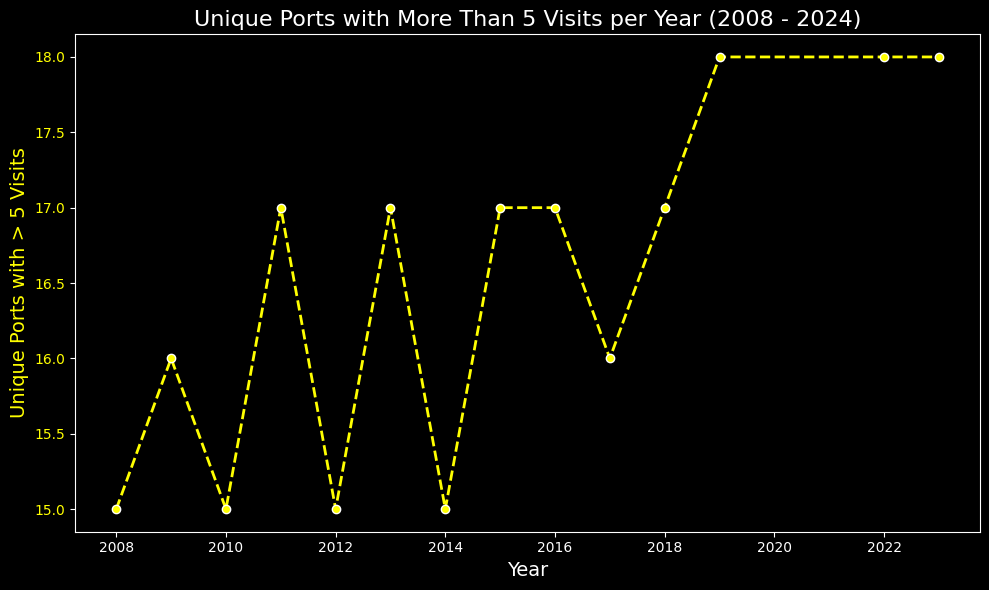

In [10]:
port_counts = attributed_claa_df['portName'].value_counts()
ports_over_5_visits = port_counts[port_counts > 5].index
filtered_df = attributed_claa_df[attributed_claa_df['portName'].isin(ports_over_5_visits)]
filtered_df = filtered_df[filtered_df['year'] != 2021]

filtered = False

if True:
    df_grouped_ports = filtered_df.groupby('year').agg({
        'portName': 'nunique'
    }).reset_index()
else:
    df_grouped_ports = attributed_claa_df.groupby('year').agg({
        'portName': 'nunique'
    }).reset_index()
    

df_grouped_ports.columns = ['year', 'unique_ports']

plt.style.use('dark_background')  # Set dark mode
plt.figure(figsize=(10, 6))
plt.plot(df_grouped_ports['year'], df_grouped_ports['unique_ports'], color='yellow', label='Unique Port Calls > 5 Visits', linewidth=2, linestyle='--')
plt.scatter(df_grouped_ports['year'], df_grouped_ports['unique_ports'], color='yellow', edgecolor='white', zorder=5)  # Adding points
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unique Ports with > 5 Visits', color='yellow', fontsize=14)
plt.tick_params(axis='y', labelcolor='yellow')
plt.title('Unique Ports with More Than 5 Visits per Year (2008 - 2024)', fontsize=16, color='white')
plt.grid(False)

plt.tight_layout()
plt.show()

_________

#### Export ais_data as line shapefile to view all imported boatData within GIS

### Table 1a. merged table with scheduled times from CLAA pdf

## Table 2. Summary statistics

*  __for each port after GLBA__: 
_mean, std, count_ for AIS data (leg from GLBA to nextPort): 'sog', 'distanceToNextPort', 'timeToNextPort'

## Table 3.  Vessels in CLAA database via _mmsi_

### Histogram: number of unique ships in each year across all years

In [10]:
import matplotlib.pyplot as plt

portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ports = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ship_calls' : unique_ports}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

KeyError: 'year'

## Table 4. Historical port calls from 2008-2024

In [8]:
ports = claa_df[['date', 'boatName','portName', 'nextPort']]
ports = ports[ports['portName']!= 'AT SEA']
ports[['mmsi', 'imo', 'length', 'width', 'pax', 'gross_tonnage']] = None
ports['year'] = pd.to_datetime(ports['date']).dt.year

ports


,date,boatName,portName,nextPort,mmsi,imo,length,width,pax,gross_tonnage,year
0,2010-05-03,AMSTERDAM,SEATTLE,AT SEA,None,None,None,None,None,None,2010
2,2010-05-05,AMSTERDAM,GLACIER BAY,JUNEAU,None,None,None,None,None,None,2010
3,2010-05-06,AMSTERDAM,JUNEAU,SITKA,None,None,None,None,None,None,2010
4,2010-05-07,AMSTERDAM,SITKA,KETCHIKAN,None,None,None,None,None,None,2010
5,2010-05-08,AMSTERDAM,KETCHIKAN,VICTORIA,None,None,None,None,None,None,2010
...,...,...,...,...,...,...,...,...,...,...,...
68370,2019-09-27,WESTERDAM,KETCHIKAN,AT SEA,None,None,None,None,None,None,2019
68372,2019-09-29,WESTERDAM,VANCOUVER,AT SEA,None,None,None,None,None,None,2019
68374,2019-10-01,WESTERDAM,JUNEAU,NaN,None,None,None,None,None,None,2019
68375,2019-09-10,WORLD OF RESIDENSE,NOME,NOME,None,None,None,None,None,None,2019


### Histogram: number of unique ports in each year across all years

In [2]:
import matplotlib.pyplot as plt
portChanges = pd.DataFrame()

grouped = ports.groupby('year', dropna = True)
for year, group in grouped:
        unique_ports = len(group.portName.unique())
        new_row = {'year' : year,
                   'unique_ports' : unique_ports}
        portChanges = pd.concat([portChanges, pd.DataFrame([new_row])])

plt.figure(figsize=(10,4.5))
bars = plt.bar(portChanges['year'], portChanges['unique_ports'], color='skyblue', edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of unique Port Calls by Year, CLAA 2008-2023')
plt.xticks(portChanges['year']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

NameError: name 'ports' is not defined

### Table 4a. for each port, year: count vessels (unique or total?), total max pax, firstOfSeason, lastOfSeason, 

In [13]:
### Calculate statistics per port per year and display table
# ports = claa_df with a few append cols
ports = ports[['date', 'boatName', 'portName', 'year', 'pax', 'length', 'width', 'gross_tonnage']]

stats_list = []
grouped = ports.groupby(['portName', 'year'])

for (port, year), group in grouped:
    first_call = min(group.date)
    last_call = max(group.date)

    cumulative_pax = group['pax'].sum()
    count_calls = group['boatName'].count()
    mean_width = group['width'].mean()
    mean_length = group['length'].mean()
    count_unique = len(group['boatName'].unique())
    
    stats = {
        'portName': port,
        'year': year,
        'count_calls' : count_calls,
        'count_unique' : count_unique, # number of unique boats visiting each port per year
        'max_pax' : cumulative_pax,
        'first_call' : first_call,
        'last_call' : last_call,
        'mean_width' : mean_width,
        'mean_length' : mean_length
    }
    stats_list.append(stats)

stats_df = pd.DataFrame(stats_list)
stats_df


,portName,year,count_calls,count_unique,max_pax,first_call,last_call,mean_width,mean_length
0,ADAK,2008,1,1,0,2008-09-09,2008-09-09,NaN,NaN
1,ADAK,2009,1,1,0,2009-09-13,2009-09-13,NaN,NaN
2,ADAK,2010,1,1,0,2010-08-04,2010-08-04,NaN,NaN
3,ADAK,2011,1,1,0,2011-06-24,2011-06-24,NaN,NaN
4,ADAK,2012,1,1,0,2012-07-07,2012-07-07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
583,WRANGELL,2018,30,5,0,2018-05-25,2018-10-03,NaN,NaN
584,WRANGELL,2019,37,8,0,2019-05-21,2019-10-03,NaN,NaN
585,WRANGELL,2021,3,1,0,2021-08-01,2021-09-12,NaN,NaN
586,WRANGELL,2022,62,10,0,2022-05-12,2022-09-25,NaN,NaN


### Table 4b. __Dynamic Table__: For _PortA_, for each year and each next port of call outside of _PortA_, include count of ships, distance to travel, 

In [7]:
claa_df

,Unnamed: 0,date,boatName,portCode,ts_in,ts_out,portName,nextPort
0,0,2010-05-03,AMSTERDAM,SEA,2010-05-03 07:00:00,2010-05-03 16:00:00,SEATTLE,AT SEA
1,1,2010-05-04,AMSTERDAM,AS,2010-05-04 06:00:00,2010-05-04 22:00:00,AT SEA,GLACIER BAY
2,2,2010-05-05,AMSTERDAM,GB,2010-05-05 10:00:00,2010-05-05 19:00:00,GLACIER BAY,JUNEAU
3,3,2010-05-06,AMSTERDAM,JNU,2010-05-06 07:00:00,2010-05-06 20:00:00,JUNEAU,SITKA
4,4,2010-05-07,AMSTERDAM,SIT,2010-05-07 08:00:00,2010-05-07 17:00:00,SITKA,KETCHIKAN
...,...,...,...,...,...,...,...,...
68372,68372,2019-09-29,WESTERDAM,VAN,2019-09-29 07:00:00,2019-09-29 16:30:00,VANCOUVER,AT SEA
68373,68373,2019-09-30,WESTERDAM,AS,2019-09-30 06:00:00,2019-09-30 22:00:00,AT SEA,JUNEAU
68374,68374,2019-10-01,WESTERDAM,JNU,2019-10-01 13:00:00,2019-10-01 23:00:00,JUNEAU,NaN
68375,68375,2019-09-10,WORLD OF RESIDENSE,NOM,2019-09-10 09:00:00,unknown,NOME,NOME


In [9]:
#### HISTORICAL TRENDS IN DISTANCES TO NEXT PORT #### 
attributed_claa_df = claa_df.merge(a.ais_transit_table, on=['portName', 'nextPort'], how='left').dropna()
attributed_claa_df['year'] = pd.to_datetime(attributed_claa_df['date']).dt.year
attributed_claa_df['boat_id_year'] = attributed_claa_df['year'].astype(str) + '_' + attributed_claa_df['boatName'].astype(str)
attributed_claa_df

,Unnamed: 0,date,boatName,portCode,ts_in,ts_out,portName,nextPort,from_port,to_port,distance_nm_mean,distance_nm_std,distance_nm_count,duration_hrs_mean,duration_hrs_std,duration_hrs_count,segment_ids,year,boat_id_year
2,2,2010-05-05,AMSTERDAM,GB,2010-05-05 10:00:00,2010-05-05 19:00:00,GLACIER BAY,JUNEAU,Glacier Bay,Juneau,177.126667,41.660144,3.0,13.200667,0.744713,3.0,"[NORWEGIAN_SPIRIT_0187, NORWEGIAN_SUN_0179, NO...",2010,2010_AMSTERDAM
3,3,2010-05-06,AMSTERDAM,JNU,2010-05-06 07:00:00,2010-05-06 20:00:00,JUNEAU,SITKA,Juneau,Sitka,228.186667,0.940549,3.0,13.052000,0.863028,3.0,"[RUBY_PRINCESS_0103, VIKING_ORION_0047, VIKING...",2010,2010_AMSTERDAM
4,4,2010-05-07,AMSTERDAM,SIT,2010-05-07 08:00:00,2010-05-07 17:00:00,SITKA,KETCHIKAN,Sitka,Ketchikan,240.199412,25.383104,34.0,14.670324,3.931162,34.0,"[CROWN_PRINCESS_0067, CROWN_PRINCESS_0161, EUR...",2010,2010_AMSTERDAM
5,5,2010-05-08,AMSTERDAM,KTN,2010-05-08 07:00:00,2010-05-08 13:00:00,KETCHIKAN,VICTORIA,Ketchikan,Victoria,587.603043,9.856514,23.0,29.892391,2.377377,23.0,"[QUEEN_ELIZABETH_0027, QUEEN_ELIZABETH_0043, Q...",2010,2010_AMSTERDAM
6,6,2010-05-09,AMSTERDAM,VIC,2010-05-09 18:00:00,2010-05-09 23:59:00,VICTORIA,SEATTLE,Victoria,Seattle,57.003810,50.206721,21.0,3.833000,5.192184,21.0,"[ROYAL_PRINCESS_0013, ROYAL_PRINCESS_0025, ROY...",2010,2010_AMSTERDAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68354,68354,2019-09-11,WESTERDAM,JNU,2019-09-11 10:00:00,2019-09-11 22:00:00,JUNEAU,SKAGWAY,Juneau,Skagway,98.807772,1.513485,193.0,7.963487,1.781696,193.0,"[CROWN_PRINCESS_0003, CROWN_PRINCESS_0029, CRO...",2019,2019_WESTERDAM
68355,68355,2019-09-12,WESTERDAM,SKG,2019-09-12 07:00:00,2019-09-12 21:00:00,SKAGWAY,GLACIER BAY,Skagway,Glacier Bay,112.112438,4.906609,160.0,9.183419,0.890161,160.0,"[GRAND_PRINCESS_0011, GRAND_PRINCESS_0033, GRA...",2019,2019_WESTERDAM
68361,68361,2019-09-18,WESTERDAM,HNS,2019-09-18 06:30:00,2019-09-18 21:00:00,HAINES,JUNEAU,Haines,Juneau,96.812143,15.281166,14.0,10.634857,1.434002,14.0,"[QUEEN_ELIZABETH_0097, RUBY_PRINCESS_0025, RUB...",2019,2019_WESTERDAM
68362,68362,2019-09-19,WESTERDAM,JNU,2019-09-19 08:00:00,2019-09-19 18:00:00,JUNEAU,KETCHIKAN,Juneau,Ketchikan,310.081077,54.791604,65.0,24.397969,26.652777,65.0,"[CROWN_PRINCESS_0019, GRAND_PRINCESS_0003, GRA...",2019,2019_WESTERDAM


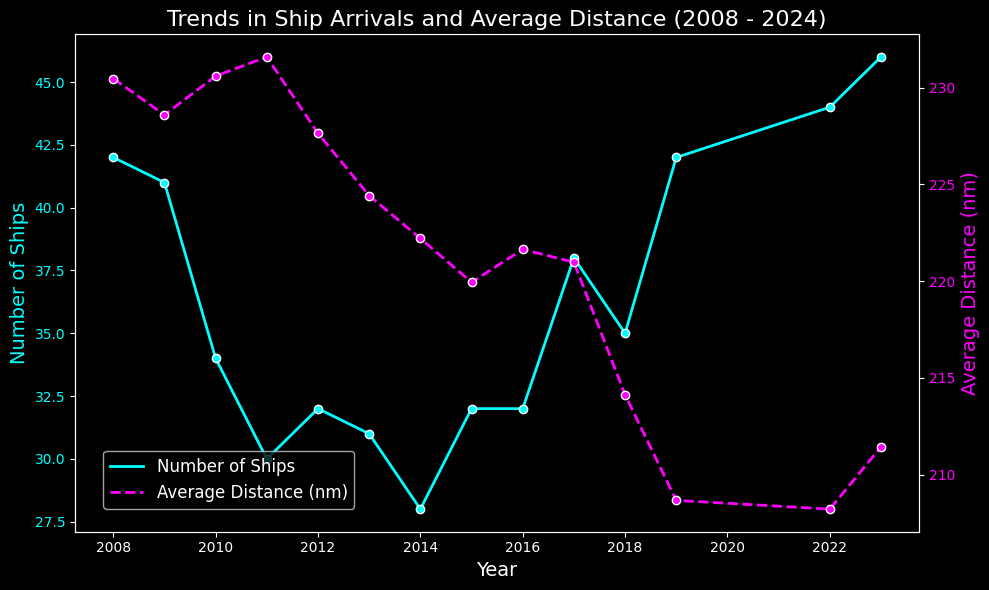

In [10]:

attributed_claa_df_no2021 = attributed_claa_df[attributed_claa_df.year != 2021]
df_grouped = attributed_claa_df_no2021.groupby('year').agg({
    'boatName': 'nunique',  # Count unique ships
    'distance_nm_mean': 'mean'   # Calculate average distance
}).reset_index()

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_grouped['year'], df_grouped['boatName'], color='cyan', label='Number of Ships', linewidth=2)
ax1.scatter(df_grouped['year'], df_grouped['boatName'], color='cyan', edgecolor='white', zorder=5)  
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Ships', color='cyan', fontsize=14)
ax1.tick_params(axis='y', labelcolor='cyan')

ax2 = ax1.twinx()
ax2.plot(df_grouped['year'], df_grouped['distance_nm_mean'], color='magenta', label='Average Distance (nm)', linewidth=2, linestyle='--')
ax2.scatter(df_grouped['year'], df_grouped['distance_nm_mean'], color='magenta', edgecolor='white', zorder=5)
ax2.set_ylabel('Average Distance (nm)', color='magenta', fontsize=14)
ax2.tick_params(axis='y', labelcolor='magenta')


plt.title('Trends in Ship Arrivals and Average Distance (2008 - 2024)', fontsize=16, color='white')
ax1.grid(False)  
ax2.grid(False) 
fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.13), fontsize=12) 

plt.tight_layout()
plt.show()

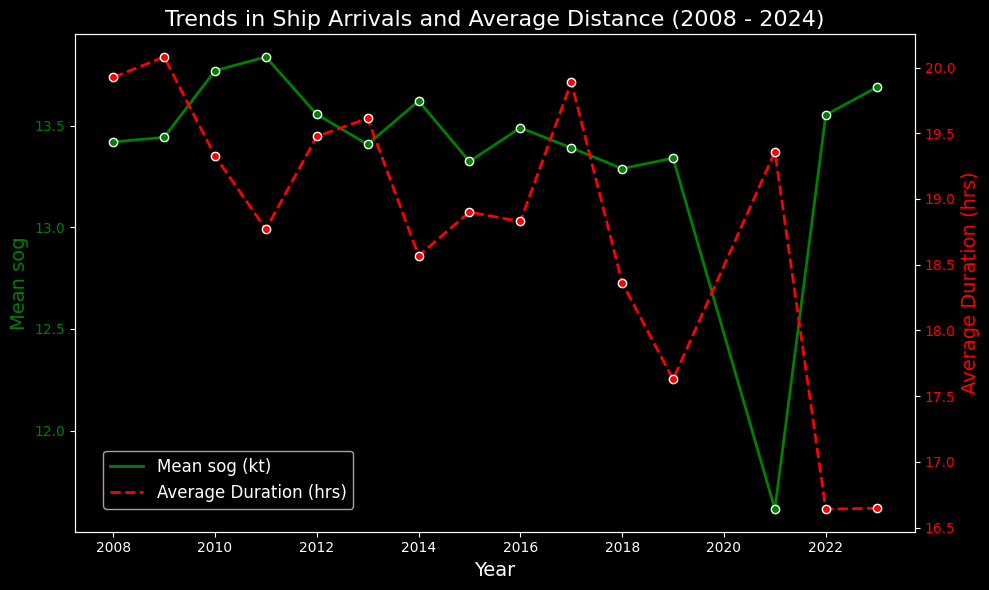

In [121]:
import numpy as np
attributed_claa_df['mean_sog'] = np.where(
    attributed_claa_df['duration_hrs_mean'] != 0, 
    attributed_claa_df['distance_nm_mean'] / attributed_claa_df['duration_hrs_mean'],
    np.nan  
)

df_grouped = attributed_claa_df.groupby('year').agg({
    'boatName': 'nunique',  # Count unique ships
    'mean_sog': 'mean',  # Calculate average distance
    'duration_hrs_mean' : 'mean'
}).reset_index()

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_grouped['year'], df_grouped['mean_sog'], color='green', label='Mean sog (kt)', linewidth=2)
ax1.scatter(df_grouped['year'], df_grouped['mean_sog'], color='green', edgecolor='white', zorder=5) 
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Mean sog', color='green', fontsize=14)
ax1.tick_params(axis='y', labelcolor='green')
ax2 = ax1.twinx()
ax2.plot(df_grouped['year'], df_grouped['duration_hrs_mean'], color='red', label='Average Duration (hrs)', linewidth=2, linestyle='--')
ax2.scatter(df_grouped['year'], df_grouped['duration_hrs_mean'], color='red', edgecolor='white', zorder=5)
ax2.set_ylabel('Average Duration (hrs)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red')


plt.title('Trends in Ship Arrivals and Average Distance (2008 - 2024)', fontsize=16, color='white')
ax1.grid(False)
ax2.grid(False)

fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.13), fontsize=12) 

plt.tight_layout()
plt.show()

In [15]:
port_counts = attributed_claa_df['portName'].value_counts()
port_counts

JUNEAU              5683
SKAGWAY             4125
KETCHIKAN           3760
VICTORIA            2870
GLACIER BAY         2803
HUBBARD GLACIER     2262
SITKA               1463
ICY STRAIT POINT     878
SEWARD               548
COLLEGE FJORD        503
TRACY ARM            456
WHITTIER             425
HAINES               335
ENDICOTT ARM         313
VALDEZ                86
VANCOUVER             75
WRANGELL              74
SEATTLE               35
PRINCE RUPERT          4
Name: portName, dtype: int64

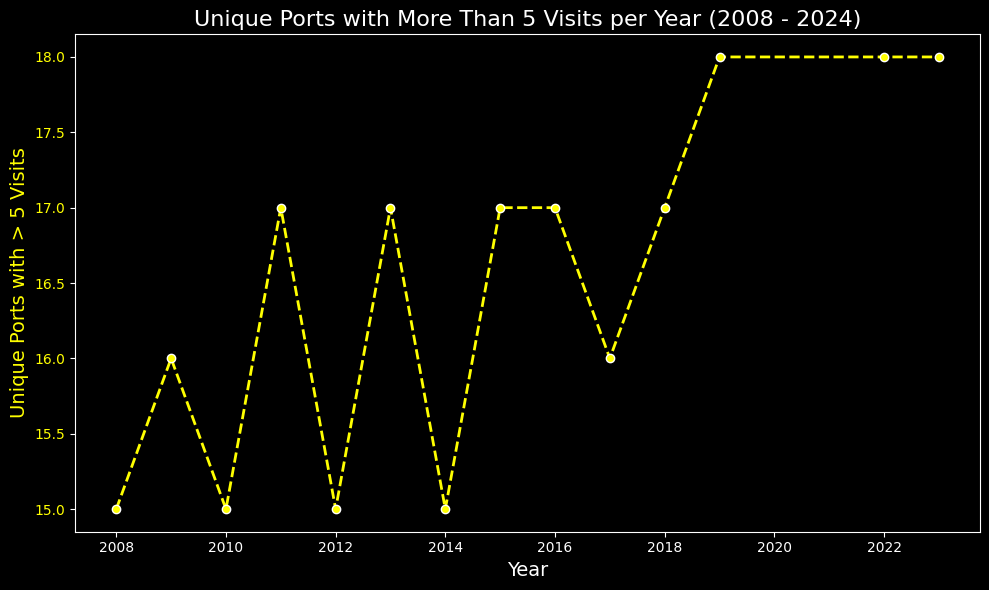

In [16]:
port_counts = attributed_claa_df['portName'].value_counts()
ports_over_5_visits = port_counts[port_counts > 5].index
filtered_df = attributed_claa_df[attributed_claa_df['portName'].isin(ports_over_5_visits)]
filtered_df = filtered_df[filtered_df['year'] != 2021]

filtered = False

if True:
    df_grouped_ports = filtered_df.groupby('year').agg({
        'portName': 'nunique'
    }).reset_index()
else:
    df_grouped_ports = attributed_claa_df.groupby('year').agg({
        'portName': 'nunique'
    }).reset_index()
    

df_grouped_ports.columns = ['year', 'unique_ports']

plt.style.use('dark_background')  # Set dark mode
plt.figure(figsize=(10, 6))
plt.plot(df_grouped_ports['year'], df_grouped_ports['unique_ports'], color='yellow', label='Unique Port Calls > 5 Visits', linewidth=2, linestyle='--')
plt.scatter(df_grouped_ports['year'], df_grouped_ports['unique_ports'], color='yellow', edgecolor='white', zorder=5)  # Adding points
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unique Ports with > 5 Visits', color='yellow', fontsize=14)
plt.tick_params(axis='y', labelcolor='yellow')
plt.title('Unique Ports with More Than 5 Visits per Year (2008 - 2024)', fontsize=16, color='white')
plt.grid(False)

plt.tight_layout()
plt.show()

## Table 5. Glaciers as destinations

* for each year, count of visits to a port call with a glacier: (GLBA, Hubbard, College Fjord, Endicot, Tracey)

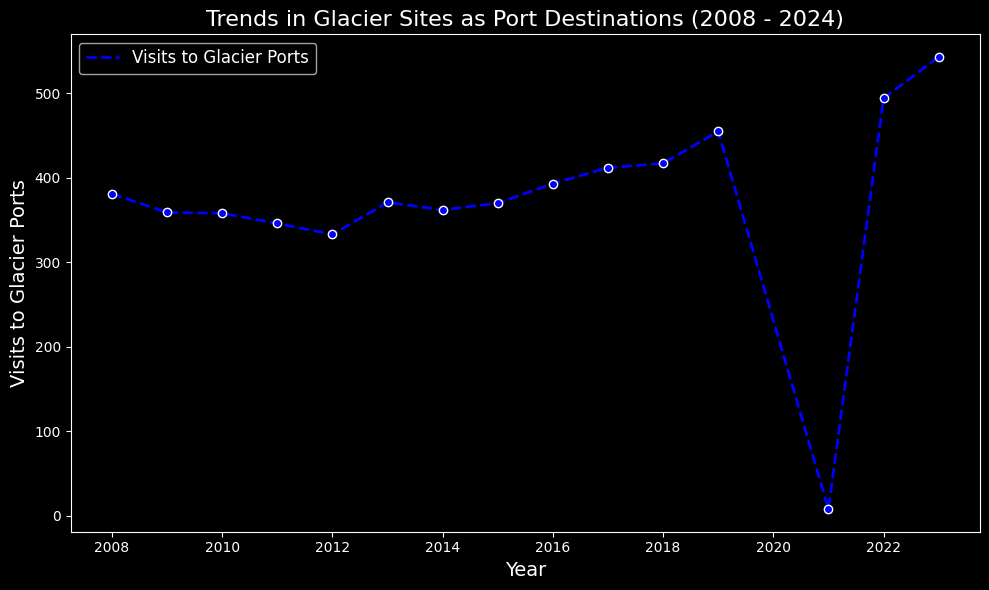

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

claa_df['year'] = pd.to_datetime(claa_df['date']).dt.year
df = claa_df[claa_df['portName'].str.contains('GLACIER', case=False, na=False)]

df_grouped_glaciers = df.groupby('year').agg({
    'portName': 'count'
}).reset_index()

plt.style.use('dark_background')  # Set dark mode

plt.figure(figsize=(10, 6))
plt.plot(df_grouped_glaciers['year'], df_grouped_glaciers['portName'], color='blue', label='Visits to Glacier Ports', linewidth=2, linestyle='--')
plt.scatter(df_grouped_glaciers['year'], df_grouped_glaciers['portName'], color='blue', edgecolor='white', zorder=5)  # Adding points
plt.xlabel('Year', fontsize=14)
plt.ylabel('Visits to Glacier Ports', color='white', fontsize=14)
plt.tick_params(axis='y', labelcolor='white')
plt.title('Trends in Glacier Sites as Port Destinations (2008 - 2024)', fontsize=16, color='white')
plt.grid(False)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

In [112]:
##### ASSIGN PORT AS A GLACIER PORT #####
import numpy as np
claa_df['year'] = pd.to_datetime(claa_df['date']).dt.year

glacier_ports = ['GLACIER BAY', 'TRACY ARM', 'ENDICOTT ARM', 'HUBBARD GLACIER', 'COLLEGE FJORD', 'MISTY FJORD']
claa_df['glacier_port'] = claa_df['portName'].apply(lambda x: any(port in x.upper() for port in glacier_ports))
claa_df['mod_port'] = np.where(claa_df['glacier_port'], 'GLACIER', claa_df['portName'])
#claa_df[claa_df.glacier_port == True]

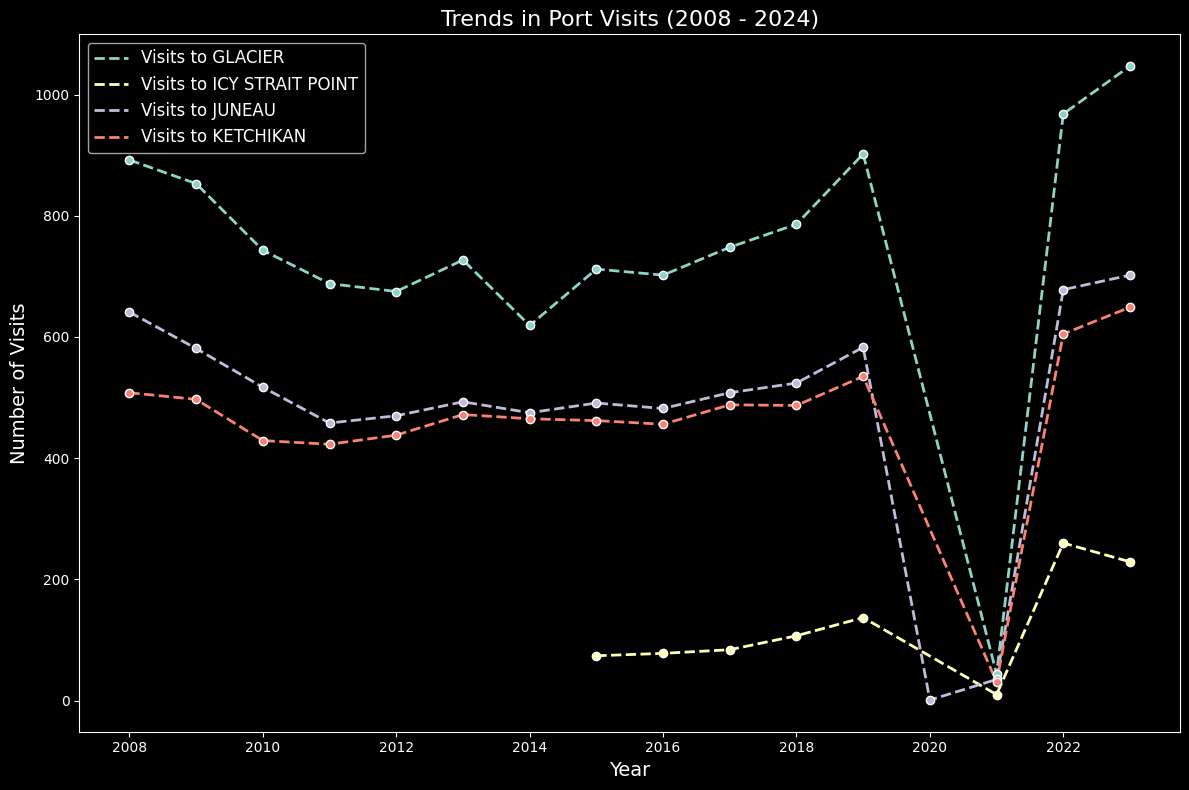

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

port_groups = ['GLACIER',  # Group of ports
    'ICY STRAIT POINT',  # Single port
    'JUNEAU',
    'KETCHIKAN'  # Single port
]
plt.style.use('dark_background')  # Set dark mode
plt.figure(figsize=(12, 8))
for port_group in port_groups:
    if isinstance(port_group, list):
        port_name_pattern = '|'.join(port_group)  # Create a regex pattern for the list of ports
    else:
        port_name_pattern = port_group
    
    df_subset = claa_df[claa_df['mod_port'].str.contains(port_name_pattern, case=False, na=False)]
    
    df_grouped = df_subset.groupby('year').agg({
        'mod_port': 'count'
    }).reset_index()
    
    plt.plot(df_grouped['year'], df_grouped['mod_port'], label=f'Visits to {port_group}', linewidth=2, linestyle='--')
    plt.scatter(df_grouped['year'], df_grouped['mod_port'], edgecolor='white', zorder=5)  # Adding points

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Visits', color='white', fontsize=14)
plt.tick_params(axis='y', labelcolor='white')
plt.title('Trends in Port Visits (2008 - 2024)', fontsize=16, color='white')
plt.grid(False)

plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

## Map 1: representative routes for each port call after GLBA, heatmap style from 2023 AIS data

In [88]:
rasters_dict = Mapper(ais_data_glba_to_next_port).writeRasters('next_port', 'sog')
Mapper.plotRaster('Skagway', rasters_dict)


NameError: name 'ais_data_glba_to_next_port' is not defined

## __Next Stage__: Assessing management alternatives.

### Table 6. produce table with appended fields showing new avg sog, emissions factors, etc, for each alternative (15 min, 30 min, etc.)


#### Demonstrate adjustments for leg from GLBA to next Port

In [7]:
assert(len(ais_data_glba_to_next_port.segment_id.unique()) == 258) # confirm we have all the data we need
alts_after_glba = Geoprocessor.generate_management_alternatives(ais_data_glba_to_next_port, 'segment_id', [-30, 15, 30, 60])
for key, value in alts_after_glba.items():
    #print(key, ' ', len(value))
    pass

In [8]:
test = alts_after_glba['VOLENDAM_99_inc_60']
test[['bs_ts', 'bs_ts_new', 'delta_t', 'delta_t_new', 'sog', 'sog_new', 'name', 'next_port']]

,bs_ts,bs_ts_new,delta_t,delta_t_new,sog,sog_new,name,next_port
0,2023-07-23 15:03:29-08:00,2023-07-23 15:03:29-08:00,NaN,NaN,11.8,11.217276,VOLENDAM,Ketchikan
1,2023-07-23 15:03:49-08:00,2023-07-23 15:03:50.038976060-08:00,0.333333,0.350650,12.1,11.502461,VOLENDAM,Ketchikan
2,2023-07-23 15:04:09-08:00,2023-07-23 15:04:11.077952060-08:00,0.333333,0.350650,12.4,11.787646,VOLENDAM,Ketchikan
3,2023-07-23 15:04:29-08:00,2023-07-23 15:04:32.116928120-08:00,0.333333,0.350650,12.7,12.072831,VOLENDAM,Ketchikan
4,2023-07-23 15:05:09-08:00,2023-07-23 15:05:14.194880180-08:00,0.666667,0.701299,13.3,12.643201,VOLENDAM,Ketchikan
...,...,...,...,...,...,...,...,...
525,2023-07-24 10:14:59-08:00,2023-07-24 11:14:48.142700480-08:00,0.666667,0.701299,1.9,1.806172,VOLENDAM,Ketchikan
526,2023-07-24 10:15:32-08:00,2023-07-24 11:15:22.857010940-08:00,0.550000,0.578572,1.4,1.330863,VOLENDAM,Ketchikan
527,2023-07-24 10:16:19-08:00,2023-07-24 11:16:12.298604600-08:00,0.783333,0.824027,1.0,0.950617,VOLENDAM,Ketchikan
528,2023-07-24 10:18:00-08:00,2023-07-24 11:17:58.545433580-08:00,1.683333,1.770780,0.8,0.760493,VOLENDAM,Ketchikan


#### Demonstrate adjustments for leg within GLBA

In [4]:
ais_data_within_glba
assert(len(ais_data_within_glba.segment_id.unique()) == 258) # confirm we have all the data we need
alts_within_glba = Geoprocessor.generate_management_alternatives(ais_data_within_glba, 'segment_id', [-15, 15])
#alts_within_glba



In [9]:
test = alts_within_glba['VOLENDAM_99_inc_15']
test[['bs_ts', 'bs_ts_new', 'delta_t', 'delta_t_new', 'sog', 'sog_new', 'name', 'next_port']]


,bs_ts,bs_ts_new,delta_t,delta_t_new,sog,sog_new,name,next_port
0,2023-07-23 06:10:01-08:00,2023-07-23 06:10:01-08:00,NaN,NaN,11.9,11.574349,VOLENDAM,Ketchikan
1,2023-07-23 06:10:15-08:00,2023-07-23 06:10:15.393897700-08:00,0.233333,0.239898,11.9,11.574349,VOLENDAM,Ketchikan
2,2023-07-23 06:10:40-08:00,2023-07-23 06:10:41.097286480-08:00,0.416667,0.428390,11.9,11.574349,VOLENDAM,Ketchikan
3,2023-07-23 06:11:01-08:00,2023-07-23 06:11:02.688133060-08:00,0.350000,0.359847,12.0,11.671613,VOLENDAM,Ketchikan
4,2023-07-23 06:11:30-08:00,2023-07-23 06:11:32.504064039-08:00,0.483333,0.496932,12.0,11.671613,VOLENDAM,Ketchikan
...,...,...,...,...,...,...,...,...
287,2023-07-23 15:01:38-08:00,2023-07-23 15:16:35.439664900-08:00,0.333333,0.342712,10.3,10.018134,VOLENDAM,Ketchikan
288,2023-07-23 15:01:59-08:00,2023-07-23 15:16:57.030511420-08:00,0.350000,0.359847,10.5,10.212661,VOLENDAM,Ketchikan
289,2023-07-23 15:02:18-08:00,2023-07-23 15:17:16.565086900-08:00,0.316667,0.325576,10.8,10.504451,VOLENDAM,Ketchikan
290,2023-07-23 15:02:49-08:00,2023-07-23 15:17:48.437288980-08:00,0.516667,0.531203,11.3,10.990769,VOLENDAM,Ketchikan


#### Merging alternate data (new _sog_ and _bs_ts_) into empirical AIS data tables by unique segment_id

In [9]:
# start with subset from GLBA to next port

after_glba_data_list = [] # empty list to store segment results with management alternative values
df_to_merge = pd.DataFrame()
for key, data in alts_after_glba.items():
    if '_inc_60' in key:
        merge_key = key[:-7]
        #print(data.columns)
        after_glba_data_list.append(data[['segment_id', 'bs_ts', 'bs_ts_new', 'sog', 'sog_new', 'delta_t', 'delta_t_new']])
df_to_merge = pd.concat([pd.DataFrame(df) for df in after_glba_data_list], ignore_index=True)
#print(ais_data_glba_to_next_port.columns)
#print(df_to_merge)
merged_alt_ais_after_glba = ais_data_glba_to_next_port.merge(df_to_merge,
                            on=['segment_id', 'bs_ts'], how='inner', suffixes=('_ais', '_alt'))

merged_alt_ais_after_glba[['bs_ts','name','sog_ais','next_port','segment_id','sog_alt','sog_new','bs_ts_new']]

,bs_ts,name,sog_ais,next_port,segment_id,sog_alt,sog_new,bs_ts_new
0,2023-04-26 15:01:57-08:00,NORWEGIAN BLISS,9.0,Ketchikan,NORWEGIAN_BLISS_13,9.0,8.458990,2023-04-26 15:01:57-08:00
1,2023-04-26 15:02:37-08:00,NORWEGIAN BLISS,9.7,Ketchikan,NORWEGIAN_BLISS_13,9.7,9.116912,2023-04-26 15:02:39.558271740-08:00
2,2023-04-26 15:03:07-08:00,NORWEGIAN BLISS,10.2,Ketchikan,NORWEGIAN_BLISS_13,10.2,9.586855,2023-04-26 15:03:11.476975560-08:00
3,2023-04-26 15:03:46-08:00,NORWEGIAN BLISS,10.8,Ketchikan,NORWEGIAN_BLISS_13,10.8,10.150788,2023-04-26 15:03:52.971290520-08:00
4,2023-04-26 15:04:16-08:00,NORWEGIAN BLISS,11.3,Ketchikan,NORWEGIAN_BLISS_13,11.3,10.620732,2023-04-26 15:04:24.889994340-08:00
...,...,...,...,...,...,...,...,...
141419,2023-06-27 10:27:14-08:00,QUEEN ELIZABETH,1.4,Ketchikan,QUEEN_ELIZABETH_75,1.4,1.327024,2023-06-27 11:27:00.251985800-08:00
141420,2023-06-27 10:29:33-08:00,QUEEN ELIZABETH,1.1,Ketchikan,QUEEN_ELIZABETH_75,1.1,1.042662,2023-06-27 11:29:26.895881720-08:00
141421,2023-06-27 10:29:53-08:00,QUEEN ELIZABETH,0.9,Ketchikan,QUEEN_ELIZABETH_75,0.9,0.853087,2023-06-27 11:29:47.995722860-08:00
141422,2023-06-27 10:31:13-08:00,QUEEN ELIZABETH,0.5,Ketchikan,QUEEN_ELIZABETH_75,0.5,0.473937,2023-06-27 11:31:12.395087360-08:00


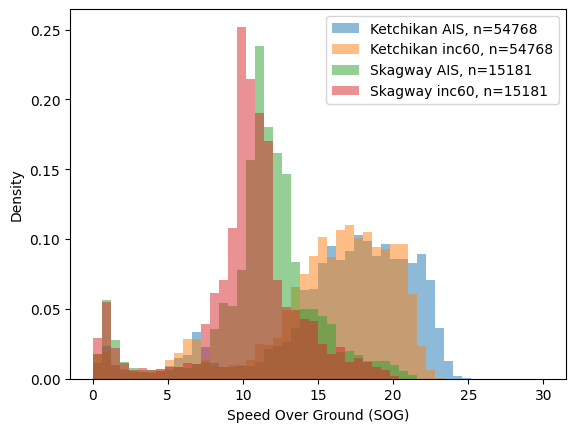

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual DataFrame)
#data = {'sog': np.random.normal(loc=5, size=100),
#        'boat': np.random.choice(['Boat A', 'Boat B', 'Boat C'], size=100)}

data = merged_alt_ais_after_glba

df = pd.DataFrame(data)

# Extract 'sog' data for each category
sog_boatA = df[df['next_port'] == 'Ketchikan']['sog_ais']
sog_boatB = df[df['next_port'] == 'Ketchikan']['sog_new']
sog_boatC = df[df['next_port'] == 'Skagway']['sog_ais']
sog_boatD = df[df['next_port'] == 'Skagway']['sog_new']


# Plot histograms for each boat's sog
_, bins, _ = plt.hist(sog_boatA, bins=50, range=[0, 30], density=True, alpha=0.5, label=f"Ketchikan AIS, n={len(sog_boatA)}")
_ = plt.hist(sog_boatB, bins=bins, density=True, alpha=0.5, label=f"Ketchikan inc60, n={len(sog_boatB)}")
_ = plt.hist(sog_boatC, bins=bins, density=True, alpha=0.5, label=f"Skagway AIS, n={len(sog_boatC)}")
_ = plt.hist(sog_boatD, bins=bins, density=True, alpha=0.5, label=f"Skagway inc60, n={len(sog_boatD)}")

# Add labels and legend
plt.xlabel('Speed Over Ground (SOG)')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()

### Step 1: Emissions in the Actual Scenario

The total emissions in the actual scenario consist of both variable emissions (due to fuel consumption dependent on speed) and fixed emissions (due to auxiliary loads, such as powering lights):

$$
E_{\text{total, actual}} = E_{\text{var, actual}} + E_{\text{fixed, actual}}
$$

#### 1.1 Variable Emissions:

The variable emissions are based on the speed \( S_{\text{actual}} \) over time, and the fuel consumption rate \( F(S) \) is a function of speed:

$$
E_{\text{var, actual}} = \int_0^{t_{\text{actual}}} F(S_{\text{actual}}(t)) \, dt
$$

We assume the fuel consumption $ F(S) $ follows a power law:

$$
F(S) = a \cdot S^b
$$

Where:
- \( a \) is a constant related to the fuel consumption rate,
- \( b \) is typically greater than 1 (often around 2), reflecting that fuel consumption increases non-linearly with speed.

Thus, the variable emissions become:

$$
E_{\text{var, actual}} = \int_0^{t_{\text{actual}}} a \cdot S_{\text{actual}}(t)^b \, dt
$$




#### 1.2 Fixed Emissions:

The fixed emissions are due to the constant auxiliary load $ P_{\text{fixed}} $ running over the duration $ t_{\text{actual}} $:

$$
E_{\text{fixed, actual}} = P_{\text{fixed}} \cdot t_{\text{actual}}
$$



### Step 2: Emissions in the Adjusted Scenario

When the trip duration is adjusted, the speed $ S_{\text{adjusted}} $ decreases, and the total time increases to $ t_{\text{adjusted}} = t_{\text{actual}} + 60 $. The total emissions in the adjusted scenario are:

$$
E_{\text{total, adjusted}} = E_{\text{var, adjusted}} + E_{\text{fixed, adjusted}}
$$



#### 2.1 Variable Emissions (Adjusted Speed):

The variable emissions in the adjusted scenario depend on the adjusted speed $ S_{\text{adjusted}} $:

$$
E_{\text{var, adjusted}} = \int_0^{t_{\text{adjusted}}} F(S_{\text{adjusted}}(t)) \, dt
$$

With the fuel consumption modeled as before:

$$
E_{\text{var, adjusted}} = \int_0^{t_{\text{adjusted}}} a \cdot S_{\text{adjusted}}(t)^b \, dt
$$


#### 2.2 Fixed Emissions:

Since the fixed power consumption $ P_{\text{fixed}} $ operates for a longer time, the fixed emissions increase:

$$
E_{\text{fixed, adjusted}} = P_{\text{fixed}} \cdot t_{\text{adjusted}} = P_{\text{fixed}} \cdot (t_{\text{actual}} + 60)
$$


### Step 3: Total Emissions Difference

To compare emissions between the actual and adjusted scenarios, we calculate the difference in total emissions:

$$
\Delta E = E_{\text{total, adjusted}} - E_{\text{total, actual}}
$$

Substituting the expressions for total emissions:

$$
\Delta E = \left( \int_0^{t_{\text{adjusted}}} a \cdot S_{\text{adjusted}}^b \, dt - \int_0^{t_{\text{actual}}} a \cdot S_{\text{actual}}^b \, dt \right) + P_{\text{fixed}} \cdot 60
$$





### Step 4: Optimization of $ t_{\text{adjusted}} $

The optimization problem seeks to minimize the total emissions as a function of $ t_{\text{adjusted}} $. To find the optimal $ t_{\text{adjusted}} $, we set the derivative of total emissions with respect to $ t_{\text{adjusted}} $ to zero:

$$
\frac{dE_{\text{total}}}{dt_{\text{adjusted}}} = 0
$$

This gives us the point at which further increases in time no longer reduce emissions and instead lead to greater emissions due to the fixed load being active for longer.

In [6]:
# continue with subset within GLBA

within_glba_data_list = [] # empty list to store segment results with management alternative values
df_to_merge = pd.DataFrame()
for key, data in alts_within_glba.items():
    if '_inc_15' in key:
        merge_key = key[:-7]
        #print(data.columns)
        within_glba_data_list.append(data[['segment_id', 'bs_ts', 'bs_ts_new', 'sog', 'sog_new', 'delta_t', 'delta_t_new']])
df_to_merge = pd.concat([pd.DataFrame(df) for df in within_glba_data_list], ignore_index=True)
#print(ais_data_glba_to_next_port.columns)
#print(df_to_merge)
merged_alt_ais_within_glba = ais_data_within_glba.merge(df_to_merge,
                            on=['segment_id', 'bs_ts'], how='inner', suffixes=('_ais', '_alt'))

merged_alt_ais_within_glba[['bs_ts','name','sog_ais','next_port','segment_id','sog_alt','sog_new','bs_ts_new']]

,bs_ts,name,sog_ais,next_port,segment_id,sog_alt,sog_new,bs_ts_new
0,2023-04-19 06:11:19-08:00,NORWEGIAN BLISS,12.1,Ketchikan,NORWEGIAN_BLISS_5,12.1,11.749682,2023-04-19 06:11:19-08:00
1,2023-04-19 06:11:49-08:00,NORWEGIAN BLISS,12.3,Ketchikan,NORWEGIAN_BLISS_5,12.3,11.943891,2023-04-19 06:11:49.894454380-08:00
2,2023-04-19 06:12:49-08:00,NORWEGIAN BLISS,12.8,Ketchikan,NORWEGIAN_BLISS_5,12.8,12.429415,2023-04-19 06:12:51.683363140-08:00
3,2023-04-19 06:13:48-08:00,NORWEGIAN BLISS,13.3,Ketchikan,NORWEGIAN_BLISS_5,13.3,12.914939,2023-04-19 06:13:52.442456740-08:00
4,2023-04-19 06:14:48-08:00,NORWEGIAN BLISS,13.8,Ketchikan,NORWEGIAN_BLISS_5,13.8,13.400463,2023-04-19 06:14:54.231365560-08:00
...,...,...,...,...,...,...,...,...
64316,2023-08-13 16:59:29-08:00,QUEEN ELIZABETH,8.6,Sitka,QUEEN_ELIZABETH_209,8.6,8.388963,2023-08-13 17:14:24.496981200-08:00
64317,2023-08-13 17:00:18-08:00,QUEEN ELIZABETH,9.1,Sitka,QUEEN_ELIZABETH_209,9.1,8.876693,2023-08-13 17:15:14.729651160-08:00
64318,2023-08-13 17:01:18-08:00,QUEEN ELIZABETH,9.6,Sitka,QUEEN_ELIZABETH_209,9.6,9.364424,2023-08-13 17:16:16.239042960-08:00
64319,2023-08-13 17:01:58-08:00,QUEEN ELIZABETH,9.8,Sitka,QUEEN_ELIZABETH_209,9.8,9.559516,2023-08-13 17:16:57.245304120-08:00


#### Determine the congruence between 'destination' and 'next port'

In [37]:
bliss = merged_alt_ais_after_glba[['bs_ts','name','sog_ais','destination','next_port','segment_id','sog_alt','sog_new','bs_ts_new']]

bliss = bliss[bliss.name == 'NORWEGIAN BLISS']
groups = bliss.groupby('segment_id')
for group_id, group in groups:
    print(group)

                        bs_ts             name  sog_ais    destination  \
0   2023-04-26 15:01:57-08:00  NORWEGIAN BLISS      9.0     JUNEAU, AK   
1   2023-04-26 15:02:37-08:00  NORWEGIAN BLISS      9.7     JUNEAU, AK   
2   2023-04-26 15:03:07-08:00  NORWEGIAN BLISS     10.2     JUNEAU, AK   
3   2023-04-26 15:03:46-08:00  NORWEGIAN BLISS     10.8     JUNEAU, AK   
4   2023-04-26 15:04:16-08:00  NORWEGIAN BLISS     11.3     JUNEAU, AK   
..                        ...              ...      ...            ...   
488 2023-04-27 06:39:14-08:00  NORWEGIAN BLISS      0.7  VICTORIA, CAN   
489 2023-04-27 06:39:24-08:00  NORWEGIAN BLISS      0.7  VICTORIA, CAN   
490 2023-04-27 06:39:34-08:00  NORWEGIAN BLISS      0.6  VICTORIA, CAN   
491 2023-04-27 06:39:55-08:00  NORWEGIAN BLISS      0.6  VICTORIA, CAN   
492 2023-04-27 06:40:05-08:00  NORWEGIAN BLISS      0.5  VICTORIA, CAN   

     next_port          segment_id  sog_alt    sog_new  \
0    Ketchikan  NORWEGIAN BLISS_13      9.0   8.85836

In [ ]:
for key, value in alts_within_glba.items():
    #print(key, ' ', len(value))
    pass

### Map 2: apply __management alternatives__ to AIS data to plot updated speeds onto maps to each port after GLBA

#### Produce and plot rasters showing new speeds after applying management alternatives

In [29]:
rasters_actual_sog = Mapper(merged_alt_ais_after_glba).writeRasters('next_port', 'sog_ais')
rasters_adjusted_sog = Mapper(merged_alt_ais_after_glba).writeRasters('next_port', 'sog_new')

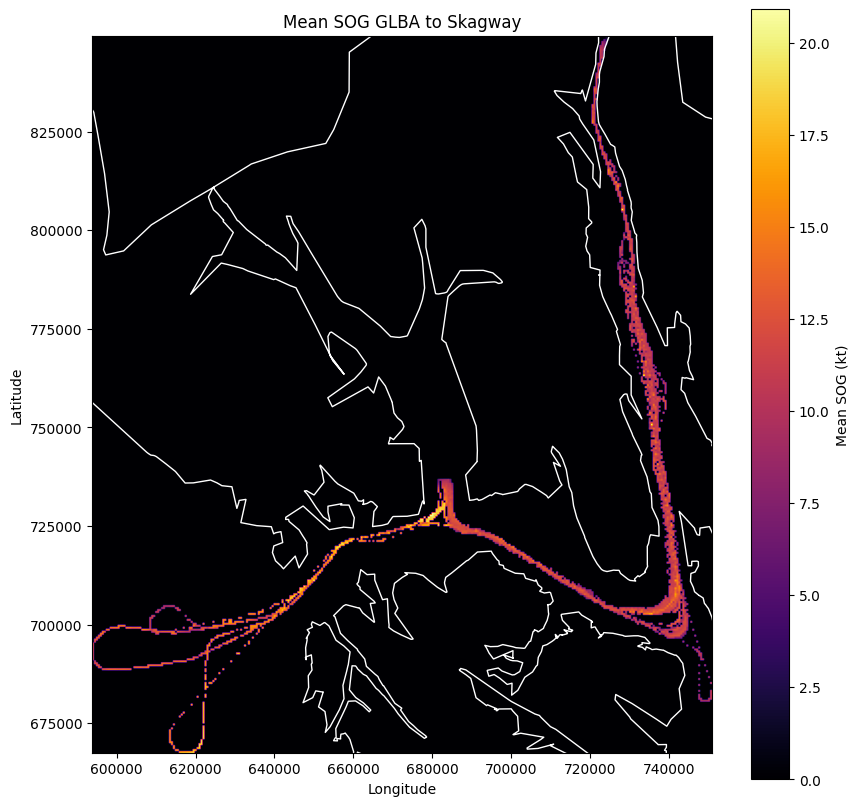

Max actual sog in the data: 25.0


In [30]:
Mapper.plotRaster('Skagway', rasters_actual_sog)
print(f'Max actual sog in the data: {merged_alt_ais_after_glba.sog_ais.max()}')


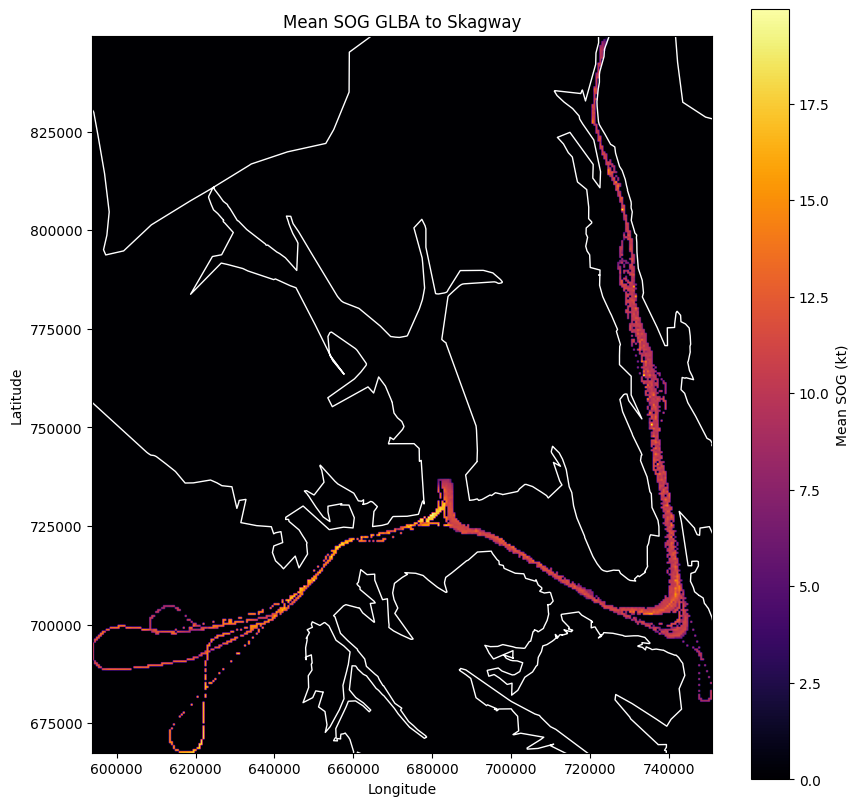

Max actual sog in the data: 23.451319819664796


In [31]:
Mapper.plotRaster('Skagway', rasters_adjusted_sog)
print(f'Max actual sog in the data: {merged_alt_ais_after_glba.sog_new.max()}')



In [ ]:
from Mapper import Mapper

#instantiate and write rasters to output folder as well as store their info in dict for plotting
rasters_dict_after_glba = Mapper(ais_data_glba_to_next_port).writeRasters('next_port', 'sog')
rasters_dict_within_glba = Mapper(ais_data_within_glba).writeRasters('next_port', 'sog')


In [ ]:
Mapper.plotRaster('Skagway', alt_rasters_dict_within_glba)

In [ ]:
Mapper.plotRaster('Skagway', alt_rasters_dict_within_glba)

#### Verifying the displacement between two points

In [10]:
from PathCalculations import PathCalculations
test = ais_data_glba_to_next_port[ais_data_glba_to_next_port.segment_id == 'NORWEGIAN BLISS_13']
test['displacement_NM'] = None

for index, row in test.iterrows():
    if index < len(test) - 1:
        displacement = PathCalculations.distanceAlongPath_nm(test.geometry, index, index + 1)
        test.loc[index, 'displacement_NM'] = displacement[1]

test

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,lat,lon,bs_ts,geometry,mmsi,callsign,imo,name,nav_status,cog,...,length,width,cruise_id,port,status,next_port,previous_port,segment_id,Unnamed: 0,displacement_NM
0,58.431127,-135.989318,2023-04-26 15:01:57-08:00,POINT (-135.98932 58.43113),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,173.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.1
1,58.429400,-135.988928,2023-04-26 15:02:37-08:00,POINT (-135.98893 58.4294),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,172.6,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.08
2,58.428020,-135.988590,2023-04-26 15:03:07-08:00,POINT (-135.98859 58.42802),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,172.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.11
3,58.426133,-135.988047,2023-04-26 15:03:46-08:00,POINT (-135.98805 58.42613),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,170.0,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.09
4,58.424617,-135.987508,2023-04-26 15:04:16-08:00,POINT (-135.98751 58.42462),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,168.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,55.403897,-131.730218,2023-04-27 06:39:14-08:00,POINT (-131.73022 55.4039),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,8.5,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
489,55.403927,-131.730228,2023-04-27 06:39:24-08:00,POINT (-131.73023 55.40393),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,349.4,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
490,55.403953,-131.730248,2023-04-27 06:39:34-08:00,POINT (-131.73025 55.40395),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,337.7,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
491,55.404005,-131.730293,2023-04-27 06:39:55-08:00,POINT (-131.73029 55.404),311000710.0,C6DL4,9751509.0,NORWEGIAN BLISS,Under way using engine,326.1,...,334.0,45.0,NORWEGIAN BLISS_02,atSea,inTransit,Ketchikan,Skagway,NORWEGIAN BLISS_13,NaN,0.0
